In [247]:
##################################################
#        3-Dimensional Z2 Lattice Gauge          #
#   By Hariprashad Ravikumar [hari1729@nmsu.edu] #
#   For Dr. Engelhardt's meeting (Dec 22, 2022)  #
##################################################

import numpy as np
import numpy.random as rnd
from scipy import random
import itertools
import matplotlib.pyplot as plt


N = 10 # Size of the lattice
latt1 = np.ones((N, N, N), dtype=int)
latt2 = np.ones((N, N, N), dtype=int)
latt3 = np.ones((N, N, N), dtype=int)

# verifying the plaquette
#start = 1
#end = 25 + 1
#latt11 = np.arange(start, end-2, 3).reshape([N, N, N])
#latt22 = np.arange(start+1, end-1, 3).reshape([N, N, N])
#latt33 = np.arange(start+2, end, 3).reshape([N, N, N])



rng = np.random.default_rng()
def randomstart():
    sites = itertools.product(range(N), range(N), range(N))
    for site in sites:
        spin = rng.integers(2)
        if spin == 0:
            spin = -1
        latt1[site] = spin
    for site in sites:
        spin = rng.integers(2)
        if spin == 0:
            spin = -1
        latt2[site] = spin
    for site in sites:
        spin = rng.integers(2)
        if spin == 0:
            spin = -1
        latt3[site] = spin
    return None


def coldstart():
    latt1[:] = 1
    latt2[:] = 1
    latt3[:] = 1
    return None      

def action_axa_update1(configuration1, configuration2, configuration3, beta):
    action_total = 0.0
    link_count = 0.0
    for t in range(N):
        for x in range(N):
            for y in range(N):
                ###############
                # middle and right
                
                #plaquette middle
                left1 = configuration1[y,t,x]
                down1 = configuration2[y,t,x]
                right1 = configuration1[y,t,(x+1)%N] ##
                top1 = configuration2[y,(t-1)%N,x]
                
                #plaquette right
                r_left = right1 ##
                r_down = configuration2[y,t,(x+1)%N]
                r_right = configuration1[y,t,(x+2)%N]
                r_top = configuration2[y,(t-1)%N,(x+1)%N]
                
                #plaquette in
                i_left = right1 ##
                i_down = configuration3[y,t,(x+1)%N]
                i_right = configuration1[(y+1)%N,t,(x+1)%N]
                i_top = configuration3[y,(t-1)%N,(x+1)%N]
                
                
                #plaquette out
                o_left = configuration1[(y-1)%N,t,(x+1)%N]
                o_down = configuration3[(y-1)%N,t,(x+1)%N]
                o_right = right1 ##
                o_top = configuration3[(y-1)%N,(t-1)%N,(x+1)%N]
                
            
                #print("updating link",latt11[y,t,(x+1)%N])
                #print(latt22[y,(t-1)%N,x],latt11[y,t,x],latt22[y,t,x])
                #print(latt22[y,t,(x+1)%N],latt11[y,t,(x+2)%N],latt22[y,(t-1)%N,(x+1)%N])
                #print(latt33[y,t,(x+1)%N],latt11[(y+1)%N,t,(x+1)%N],latt33[y,(t-1)%N,(x+1)%N])
                #print(latt33[(y-1)%N,t,(x+1)%N],latt11[(y-1)%N,t,(x+1)%N],latt33[(y-1)%N,(t-1)%N,(x+1)%N])
                
                staplesum_middle1 = ((top1*left1*down1))
                staplesum_right = ((r_down*r_right*r_top))
                staplesum_in = ((i_down*i_right*i_top))
                staplesum_out = ((o_down*o_left*o_top))
    
                staplesum_middle_right = (staplesum_middle1+staplesum_right+staplesum_in+staplesum_out) 
                bplus1 = np.exp(beta*staplesum_middle_right)
                bminus1 = np.exp(-beta*staplesum_middle_right)
                bplus1 = bplus1/(bplus1+bminus1)
                link_count += 1
                r1 = rng.uniform()
                if r1 < bplus1:
                    configuration1[y,t,(x+1)%N] = 1
                    action_total += staplesum_middle_right
                else:
                    configuration1[y,t,(x+1)%N] = -1
                    action_total -= staplesum_middle_right

    for t in range(N):
        for x in range(N):
            for y in range(N):
                ###############
                # middle and right
                
                #plaquette middle
                left1 = configuration2[x,y,t]
                down1 = configuration3[x,y,t]
                right1 = configuration2[(x+1)%N,y,t] ##
                top1 = configuration3[x,y,(t-1)%N]
                
                #plaquette right
                r_left = right1 ##
                r_down = configuration3[(x+1)%N,y,t]
                r_right = configuration2[(x+2)%N,y,t]
                r_top = configuration3[(x+1)%N,y,(t-1)%N]
                
                #plaquette in
                i_left = right1 ##
                i_down = configuration1[(x+1)%N,y,t]
                i_right = configuration2[(x+1)%N,(y+1)%N,t]
                i_top = configuration1[(x+1)%N,y,(t-1)%N]
                
                
                #plaquette out
                o_left = configuration2[(x+1)%N,(y-1)%N,t]
                o_down = configuration1[(x+1)%N,(y-1)%N,t]
                o_right = right1 ##
                o_top = configuration1[(x+1)%N,(y-1)%N,(t-1)%N]
                
            
                #print("updating link",latt22[(x+1)%N,y,t])
                #print(latt33[x,y,(t-1)%N],latt22[x,y,t],latt33[x,y,t])
                #print(latt33[(x+1)%N,y,t],latt22[(x+2)%N,y,t],latt33[(x+1)%N,y,(t-1)%N])
                #print(latt11[(x+1)%N,y,t],latt22[(x+1)%N,(y+1)%N,t],latt11[(x+1)%N,y,(t-1)%N])
                #print(latt11[(x+1)%N,(y-1)%N,t],latt22[(x+1)%N,(y-1)%N,t],latt11[(x+1)%N,(y-1)%N,(t-1)%N])
                
                staplesum_middle1 = ((top1*left1*down1))
                staplesum_right = ((r_down*r_right*r_top))
                staplesum_in = ((i_down*i_right*i_top))
                staplesum_out = ((o_down*o_left*o_top))
    
                staplesum_middle_right = (staplesum_middle1+staplesum_right+staplesum_in+staplesum_out) 
                bplus1 = np.exp(beta*staplesum_middle_right)
                bminus1 = np.exp(-beta*staplesum_middle_right)
                bplus1 = bplus1/(bplus1+bminus1)
                link_count += 1
                r1 = rng.uniform()
                if r1 < bplus1:
                    configuration2[(x+1)%N,y,t] = 1
                    action_total += staplesum_middle_right
                else:
                    configuration2[(x+1)%N,y,t] = -1
                    action_total -= staplesum_middle_right
                    

                    
    for t in range(N):
        for x in range(N):
            for y in range(N):
                ###############
                # middle and right
                
                #plaquette middle
                left1 = configuration3[t,x,y]
                down1 = configuration1[t,x,y]
                right1 = configuration3[t,(x+1)%N,y] ##
                top1 = configuration1[(t-1)%N,x,y]
                
                #plaquette right
                r_left = right1 ##
                r_down = configuration1[t,(x+1)%N,y]
                r_right = configuration3[t,(x+2)%N,y]
                r_top = configuration1[(t-1)%N,(x+1)%N,y]
                
                #plaquette in
                i_left = right1 ##
                i_down = configuration2[t,(x+1)%N,y]
                i_right = configuration3[t,(x+1)%N,(y+1)%N]
                i_top = configuration2[(t-1)%N,(x+1)%N,y]
                
                
                #plaquette out
                o_left = configuration3[t,(x+1)%N,(y-1)%N]
                o_down = configuration2[t,(x+1)%N,(y-1)%N]
                o_right = right1 ##
                o_top = configuration2[(t-1)%N,(x+1)%N,(y-1)%N]
                
            
                #print("updating link",latt33[t,(x+1)%N,y])
                #print(latt11[(t-1)%N,x,y],latt33[t,x,y],latt11[t,x,y])
                #print(latt11[t,(x+1)%N,y],latt33[t,(x+2)%N,y],latt11[(t-1)%N,(x+1)%N,y])
                #print(latt22[t,(x+1)%N,y],latt33[t,(x+1)%N,(y+1)%N],latt22[(t-1)%N,(x+1)%N,y])
                #print(latt22[t,(x+1)%N,(y-1)%N],latt33[t,(x+1)%N,(y-1)%N],latt22[(t-1)%N,(x+1)%N,(y-1)%N])
                
                staplesum_middle1 = ((top1*left1*down1))
                staplesum_right = ((r_down*r_right*r_top))
                staplesum_in = ((i_down*i_right*i_top))
                staplesum_out = ((o_down*o_left*o_top))
    
                staplesum_middle_right = (staplesum_middle1+staplesum_right+staplesum_in+staplesum_out) 
                bplus1 = np.exp(beta*staplesum_middle_right)
                bminus1 = np.exp(-beta*staplesum_middle_right)
                bplus1 = bplus1/(bplus1+bminus1)
                link_count += 1
                r1 = rng.uniform()
                if r1 < bplus1:
                    configuration3[t,(x+1)%N,y] = 1
                    action_total += staplesum_middle_right
                else:
                    configuration3[t,(x+1)%N,y] = -1
                    action_total -= staplesum_middle_right

    #print(link_count)
    return 1.-action_total/N**3/3./6., configuration1, configuration2, configuration3



def main(beta_arr):
    coldstart()
    actionn = np.zeros(len(beta_arr))
    for i, beta in enumerate(beta_arr):
        action, confi1, confi2, confi3  = action_axa_update1(latt1,latt2,latt3,beta)
        actionn[i] = action
    return actionn



#beta_arr1 = np.linspace(1., 0., 50)
#beta_arr2 = np.linspace(0., 1., 50)
#act_heating = main(beta_arr1)
#act_cooling = main(beta_arr2)
#plt.subplots(figsize=(16, 7))
#plt.plot(beta_arr1,act_heating, color='red',label= 'Heating' )
#plt.plot(beta_arr2,act_cooling, color='blue',label= 'Cooling')
#plt.xlabel("beta", fontsize=18)
#plt.ylabel("Action", fontsize=18)
#plt.legend(loc="upper right", fontsize=18)
#plt.show()



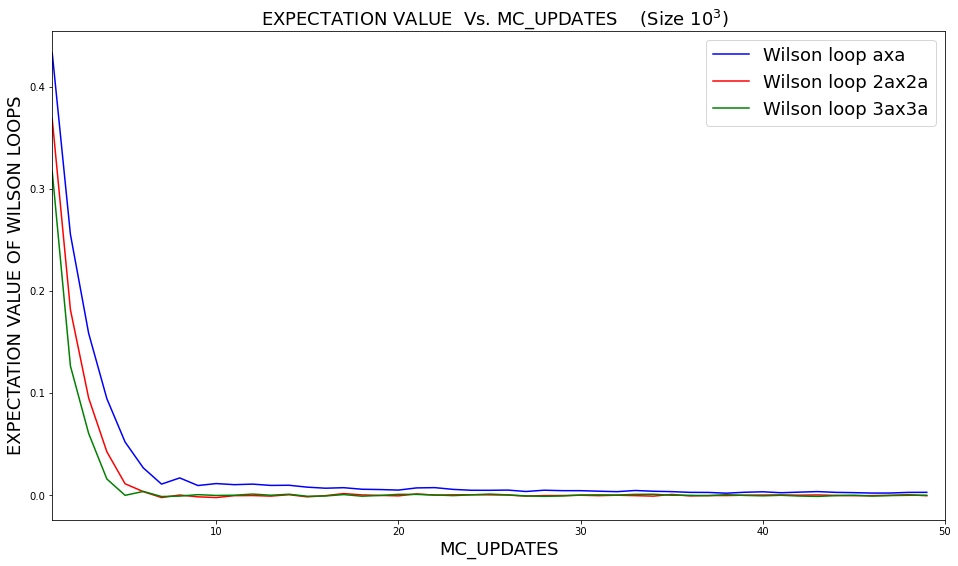

In [253]:





def wilson_axa_3d(configuration1, configuration2, configuration3, beta):
    Wilson_loop__axa = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            for y in range(N):
                left = configuration1[y,t,x]
                down = configuration2[y,t,x]
                right = configuration1[y,t,(x+1)%N]
                top = configuration2[y,(t-1)%N,x]
                Wilson_loop__axa += ((left*down*right*top))
                count += 1
    for t in range(N):
        for x in range(N):
            for y in range(N):
                left = configuration2[x,y,t]
                down = configuration3[x,y,t]
                right = configuration2[(x+1)%N,y,t]
                top = configuration3[x,y,(t-1)%N]
                Wilson_loop__axa += ((left*down*right*top))
                count += 1
    for t in range(N):
        for x in range(N):
            for y in range(N):
                left = configuration3[t,x,y]
                down = configuration1[t,x,y]
                right = configuration3[t,(x+1)%N,y]
                top = configuration1[(t-1)%N,x,y]
                Wilson_loop__axa += ((left*down*right*top))
                count += 1
    return  Wilson_loop__axa/(count)

def wilson_2ax2a_3d(configuration1, configuration2, configuration3, beta):
    Wilson_loop__2ax2a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            for y in range(N):
                left1 = configuration1[y,t,x]
                left2 = configuration1[y,(t+1)%N,x]
                down1 = configuration2[y,(t+1)%N,x]
                down2 = configuration2[y,(t+1)%N,(x+1)%N]
                right2 = configuration1[y,(t+1)%N,(x+2)%N]
                right1 = configuration1[y,t,(x+2)%N]
                top2 = configuration2[y,(t-1)%N,(x+1)%N]
                top1 = configuration2[y,(t-1)%N,x]
                Wilson_loop__2ax2a += ((left1*left2*down1*down2*right2*right1*top2*top1))
                count += 1
    for t in range(N):
        for x in range(N):
            for y in range(N):
                left1 = configuration2[x,y,t]
                left2 = configuration2[x,y,(t+1)%N]
                down1 = configuration3[x,y,(t+1)%N]
                down2 = configuration3[(x+1)%N,y,(t+1)%N]
                right2 = configuration2[(x+2)%N,y,(t+1)%N]
                right1 = configuration2[(x+2)%N,y,t]
                top2 = configuration3[(x+1)%N,y,(t-1)%N]
                top1 = configuration3[x,y,(t-1)%N]
                Wilson_loop__2ax2a += ((left1*left2*down1*down2*right2*right1*top2*top1))
                count += 1
    for t in range(N):
        for x in range(N):
            for y in range(N):
                left1 = configuration3[t,x,y]
                left2 = configuration3[(t+1)%N,x,y]
                down1 = configuration1[(t+1)%N,x,y]
                down2 = configuration1[(t+1)%N,(x+1)%N,y]
                right2 = configuration3[(t+1)%N,(x+2)%N,y]
                right1 = configuration3[t,(x+2)%N,y]
                top2 = configuration1[(t-1)%N,(x+1)%N,y]
                top1 = configuration1[(t-1)%N,x,y]
                Wilson_loop__2ax2a += ((left1*left2*down1*down2*right2*right1*top2*top1))
                count += 1

    return  Wilson_loop__2ax2a/(count)

def wilson_3ax3a_3d(configuration1, configuration2, configuration3, beta):
    Wilson_loop__3ax3a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            for y in range(N):
                left1 = configuration1[y,t,x]
                left2 = configuration1[y,(t+1)%N,x]
                left3 = configuration1[y,(t+2)%N,x]
                down1 = configuration2[y,(t+2)%N,x]
                down2 = configuration2[y,(t+2)%N,(x+1)%N]
                down3 = configuration2[y,(t+2)%N,(x+2)%N]
                right3 = configuration1[y,(t+2)%N,(x+3)%N]
                right2 = configuration1[y,(t+1)%N,(x+3)%N]
                right1 = configuration1[y,t,(x+3)%N]
                top3 = configuration2[y,(t-1)%N,(x+2)%N]
                top2 = configuration2[y,(t-1)%N,(x+1)%N]
                top1 = configuration2[y,(t-1)%N,x]
                Wilson_loop__3ax3a += ((left1*left2*left3*down1*down2*down3*right3*right2*right1*top3*top2*top1))
                count += 1
    for t in range(N):
        for x in range(N):
            for y in range(N):
                left1 = configuration2[x,y,t]
                left2 = configuration2[x,y,(t+1)%N]
                left3 = configuration2[x,y,(t+2)%N]
                down1 = configuration3[x,y,(t+2)%N]
                down2 = configuration3[(x+1)%N,y,(t+2)%N]
                down3 = configuration3[(x+2)%N,y,(t+2)%N]
                right3 = configuration2[(x+3)%N,y,(t+2)%N]
                right2 = configuration2[(x+3)%N,y,(t+1)%N]
                right1 = configuration2[(x+3)%N,y,t]
                top3 = configuration3[(x+2)%N,y,(t-1)%N]
                top2 = configuration3[(x+1)%N,y,(t-1)%N]
                top1 = configuration3[x,y,(t-1)%N]
                Wilson_loop__3ax3a += ((left1*left2*left3*down1*down2*down3*right3*right2*right1*top3*top2*top1))
                count += 1
    for t in range(N):
        for x in range(N):
            for y in range(N):
                left1 = configuration3[t,x,y]
                left2 = configuration3[(t+1)%N,x,y]
                left3 = configuration3[(t+2)%N,x,y]
                down1 = configuration1[(t+2)%N,x,y]
                down2 = configuration1[(t+2)%N,(x+1)%N,y]
                down3 = configuration1[(t+2)%N,(x+2)%N,y]
                right3 = configuration3[(t+2)%N,(x+3)%N,y]
                right2 = configuration3[(t+1)%N,(x+3)%N,y]
                right1 = configuration3[t,(x+3)%N,y]
                top3 = configuration1[(t-1)%N,(x+2)%N,y]
                top2 = configuration1[(t-1)%N,(x+1)%N,y]
                top1 = configuration1[(t-1)%N,x,y]
                Wilson_loop__3ax3a += ((left1*left2*left3*down1*down2*down3*right3*right2*right1*top3*top2*top1))
                count += 1

    return  Wilson_loop__3ax3a/(count)

def expectation_axa(beta_test,N_0,MC_steps):
    coldstart()
    coldstart()
    beta_arr = np.ones(MC_steps)*beta_test
    #exp_action_axa = np.zeros(len(beta_arr))
    exp_axa = np.zeros(len(beta_arr))
    #exp_ax2a = np.zeros(len(beta_arr))
    exp_2ax2a = np.zeros(len(beta_arr))
    #exp_ax3a = np.zeros(len(beta_arr))
    exp_3ax3a = np.zeros(len(beta_arr))
    count = 0.0
    for i, beta  in enumerate(beta_arr):
        action, config1, config2, config3 = action_axa_update1(latt1, latt2,latt3, beta)
        Wilson_loop_axa = wilson_axa_3d(config1, config2, config3, beta)
        #Wilson_loop_ax2a = wilson_ax2a(config1, config2, beta)
        Wilson_loop_2ax2a = wilson_2ax2a_3d(config1, config2, config3, beta)
        #Wilson_loop_ax3a = wilson_ax3a(config1, config2, beta)
        Wilson_loop_3ax3a = wilson_3ax3a_3d(config1, config2, config3, beta)
        count += 1 
        if count > N_0:
            #exp_action_axa[i] += action/count
            exp_axa[i] += Wilson_loop_axa/count
            #exp_ax2a[i] += Wilson_loop_ax2a/count
            exp_2ax2a[i] += Wilson_loop_2ax2a/count
            #exp_ax3a[i] += Wilson_loop_ax3a/count
            exp_3ax3a[i] += Wilson_loop_3ax3a/count
    return exp_axa, exp_2ax2a, exp_3ax3a




beta_value = 0.6
n_0 = 1
mc_steps = 50


exp_axa, exp_2ax2a, exp_3ax3a = expectation_axa(beta_value,n_0,mc_steps)


plt.subplots(figsize=(16, 9))
#plt.plot(exp_action_axa, color='blue',label= 'Action axa' )
plt.plot(exp_axa, color='blue',label= 'Wilson loop axa' )
plt.plot(exp_2ax2a, color='red',label= 'Wilson loop 2ax2a' )
plt.plot(exp_3ax3a, color='green',label= 'Wilson loop 3ax3a' )
plt.xlabel("MC_UPDATES", fontsize=18)
plt.ylabel("EXPECTATION VALUE OF WILSON LOOPS", fontsize=18)
plt.title("EXPECTATION VALUE  Vs. MC_UPDATES    (Size $%.f^3$)  "%(N), fontsize=18)
plt.xlim([n_0, mc_steps])
plt.legend( fontsize=18)
plt.show()

